In [42]:
import pandas as pd
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import matplotlib.dates as md
from dotenv import load_dotenv
from pymongo import MongoClient

In [43]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

full_palette = custom_colors + complementary_colors
sns.set_palette(full_palette)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

# Dataset details
The dataset consists of actigraphy data collected from 23 unipolar and bipolar depressed patients (condition group). In addition, the dataset contains actigraphy data from 32 non-depressed contributors (control group), consisting of 23 hospital employees, 5 students and 4 former patients without current psychiatric symptoms.

- number (patient identifier)
- days (number of days of measurements)
- gender (1 or 2 for female or male)
- age (age in age groups)
- afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I)
- melanch (1: melancholia, 2: no melancholia)
- inpatient (1: inpatient, 2: outpatient), inpatient means hospitalized
- edu (education grouped in years)
- marriage (1: married or cohabiting, 2: single)
- work (1: working or studying, 2: unemployed/sick leave/pension)
- madrs1 (MADRS score when measurement started)
- madrs2 (MADRS when measurement stopped).

In [44]:
df = pd.read_csv('..\data\depresjon\scores.csv')
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [45]:
#create_report(df).show_browser()

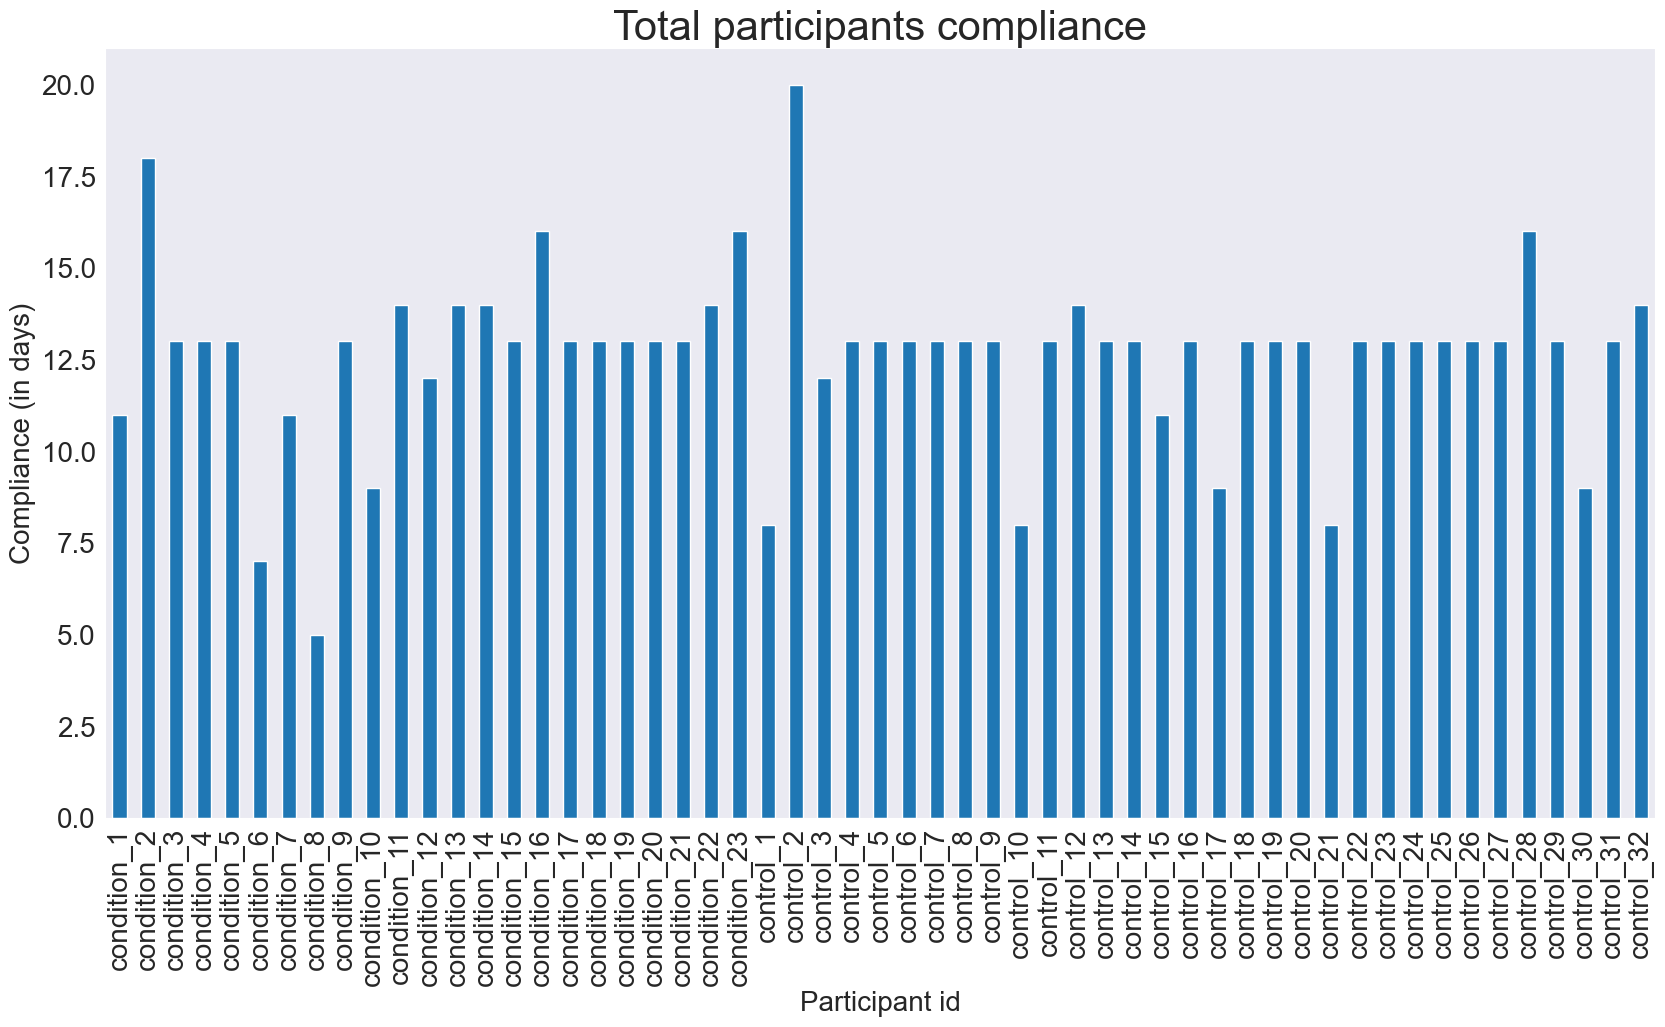

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
df.plot(x="number", y=["days"], kind="bar",ax=ax, color=custom_colors)
plt.xlabel('Participant id')
plt.ylabel('Compliance (in days)')
plt.title('Total participants compliance')
plt.grid()
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.legend_.remove()
plt.savefig("../visualizations/depresjon/compliance_per_participant.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/compliance_per_participant.eps",bbox_inches='tight')
plt.show()

In [47]:
def basic_stats(df, column='days'): # Calculate column's min, max, mean, and median
    min_value = df[column].min()
    max_value = df[column].max()
    mean_value = df[column].mean()
    median_value = df[column].median()

    print("--------------------------------------")
    print(f"Min Compliance: {min_value} days")
    print(f"Max Compliance: {max_value} days")
    print(f"Mean Compliance: {mean_value} days")
    print(f"Median Compliance: {median_value} days")
    print("--------------------------------------")

    return

print("Compliance statistics for all users")
basic_stats(df)
# Separate condition and control groups
condition_df = df[df['number'].str.startswith('condition')]
control_df = df[df['number'].str.startswith('control')]
print("Compliance statistics for condition group")
basic_stats(condition_df)
print("Compliance statistics for control group")
basic_stats(control_df)

Compliance statistics for all users
--------------------------------------
Min Compliance: 5 days
Max Compliance: 20 days
Mean Compliance: 12.6 days
Median Compliance: 13.0 days
--------------------------------------
Compliance statistics for condition group
--------------------------------------
Min Compliance: 5 days
Max Compliance: 18 days
Mean Compliance: 12.652173913043478 days
Median Compliance: 13.0 days
--------------------------------------
Compliance statistics for control group
--------------------------------------
Min Compliance: 8 days
Max Compliance: 20 days
Mean Compliance: 12.5625 days
Median Compliance: 13.0 days
--------------------------------------


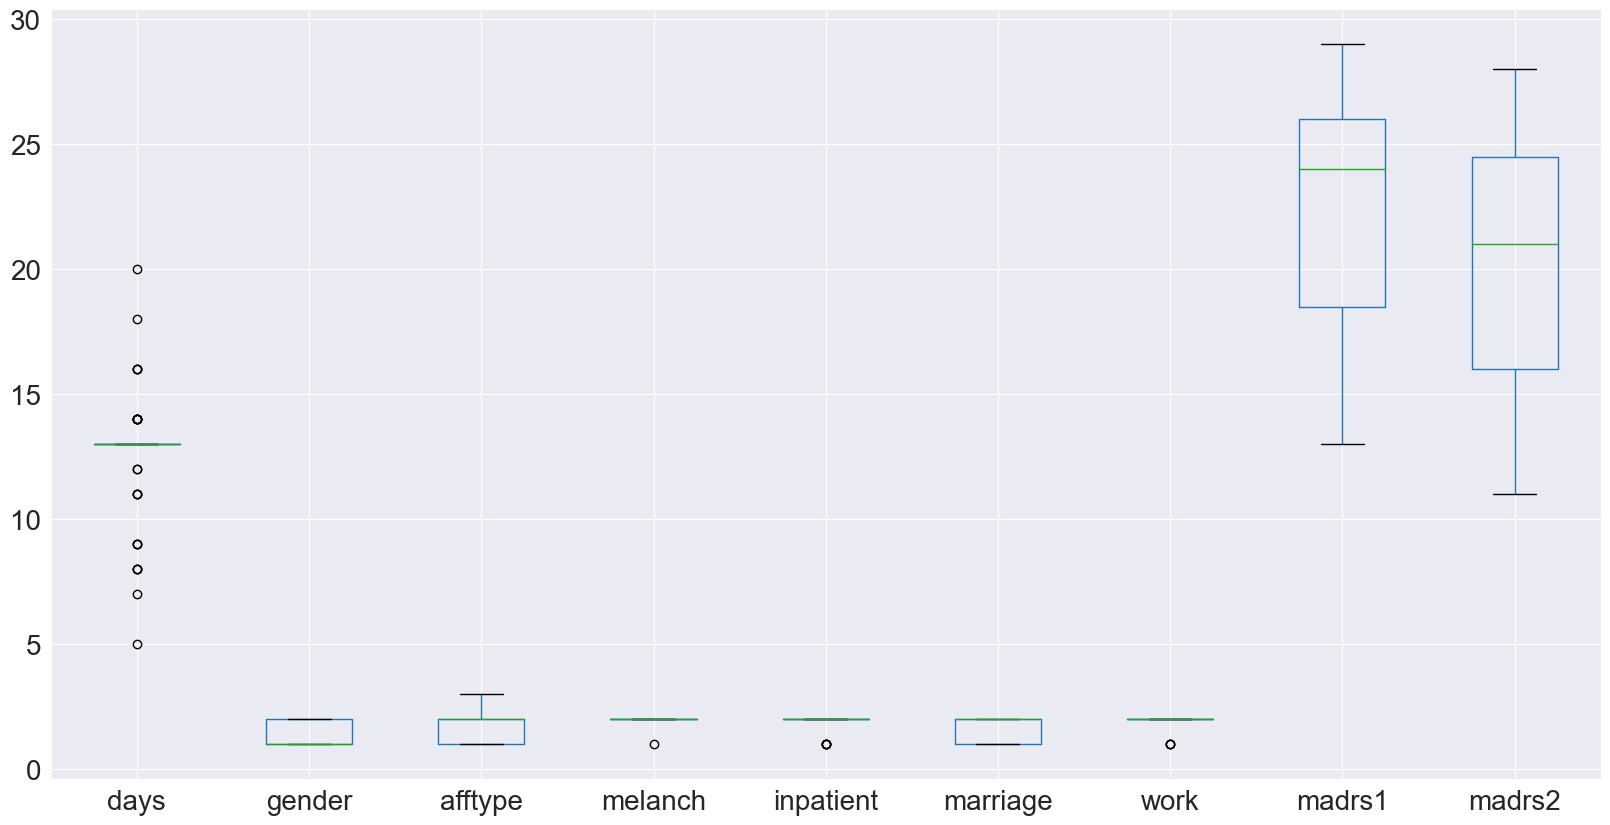

In [48]:
# a box plot for outlier visualization
df.boxplot(figsize=(20,10))
plt.savefig("../visualizations/depresjon/boxplots.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/boxplots.eps",bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


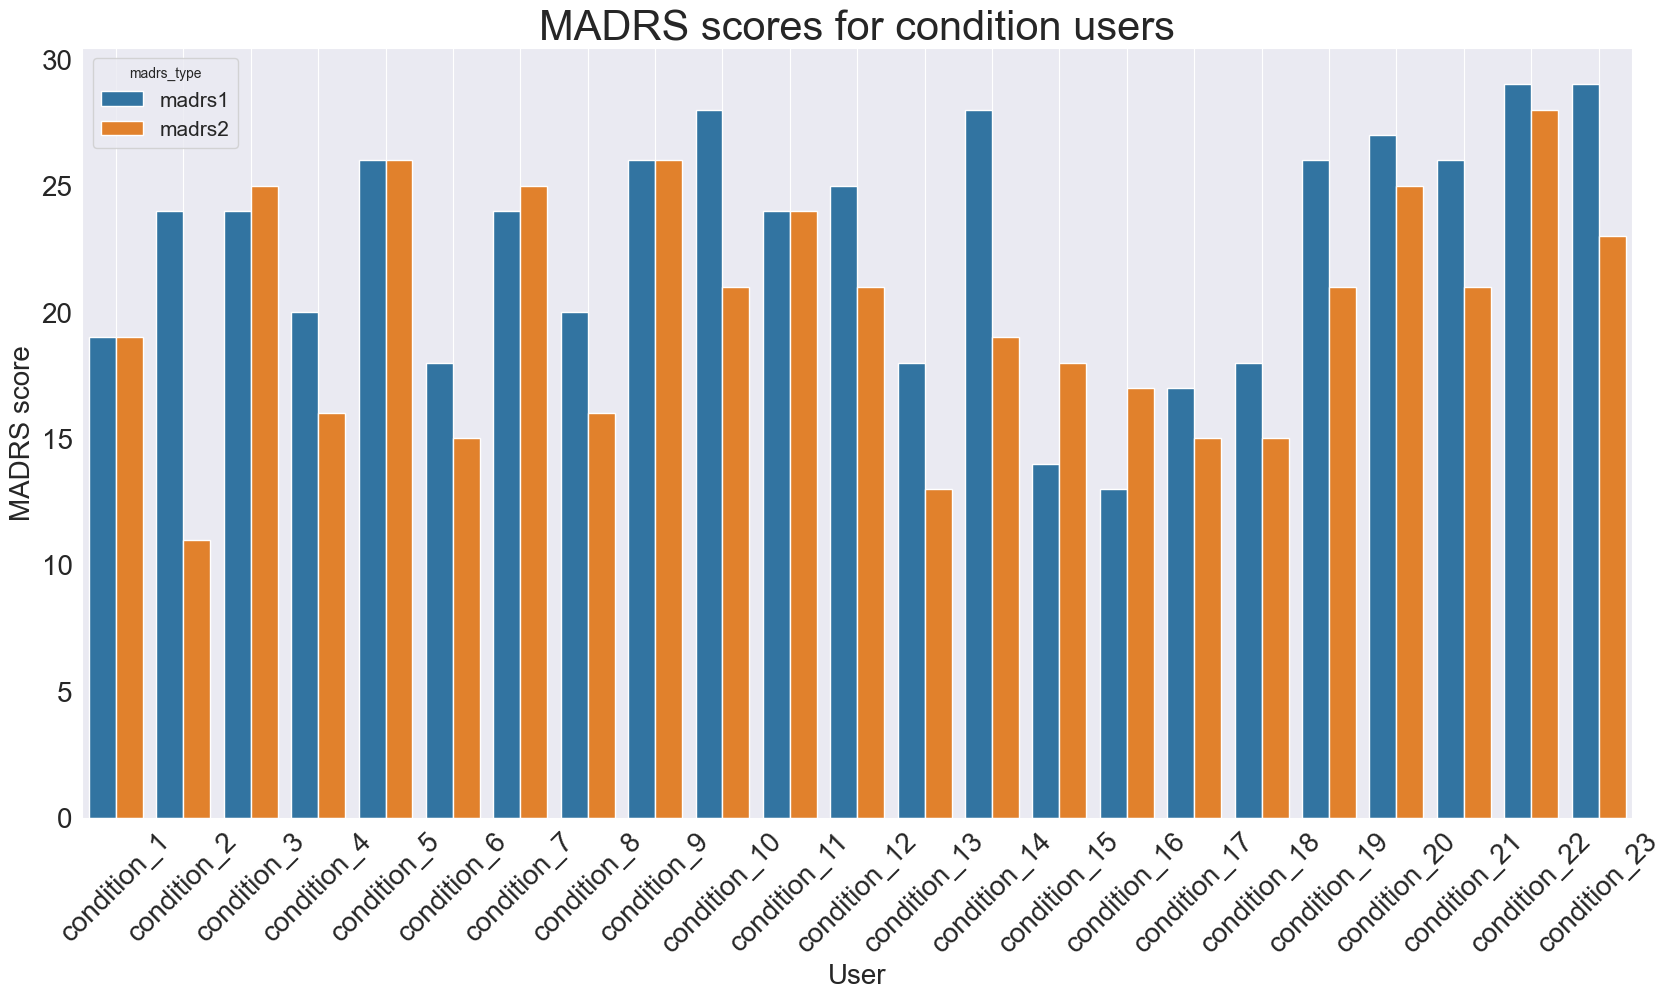

In [49]:
# Melt the DataFrame to 'long' format for seaborn
df_long = pd.melt(condition_df, id_vars=['number'], value_vars=['madrs1', 'madrs2'], var_name='madrs_type',value_name='madrs_value')

# Create a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='number', y='madrs_value', hue='madrs_type', data=df_long)
plt.title('MADRS scores for condition users')
plt.xlabel('User')
plt.ylabel('MADRS score')
plt.xticks(rotation=45)
plt.grid()
plt.savefig("../visualizations/depresjon/madrs_scores.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/madrs_scores.eps",bbox_inches='tight')
plt.show()

In [50]:
df['madrs_mean'] = df[['madrs1', 'madrs2']].mean(axis=1)
condition_df['madrs_mean'] = condition_df[['madrs1', 'madrs2']].mean(axis=1)

C:\Users\Christina\AppData\Local\Temp\ipykernel_48816\875553676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_df['madrs_mean'] = condition_df[['madrs1', 'madrs2']].mean(axis=1)


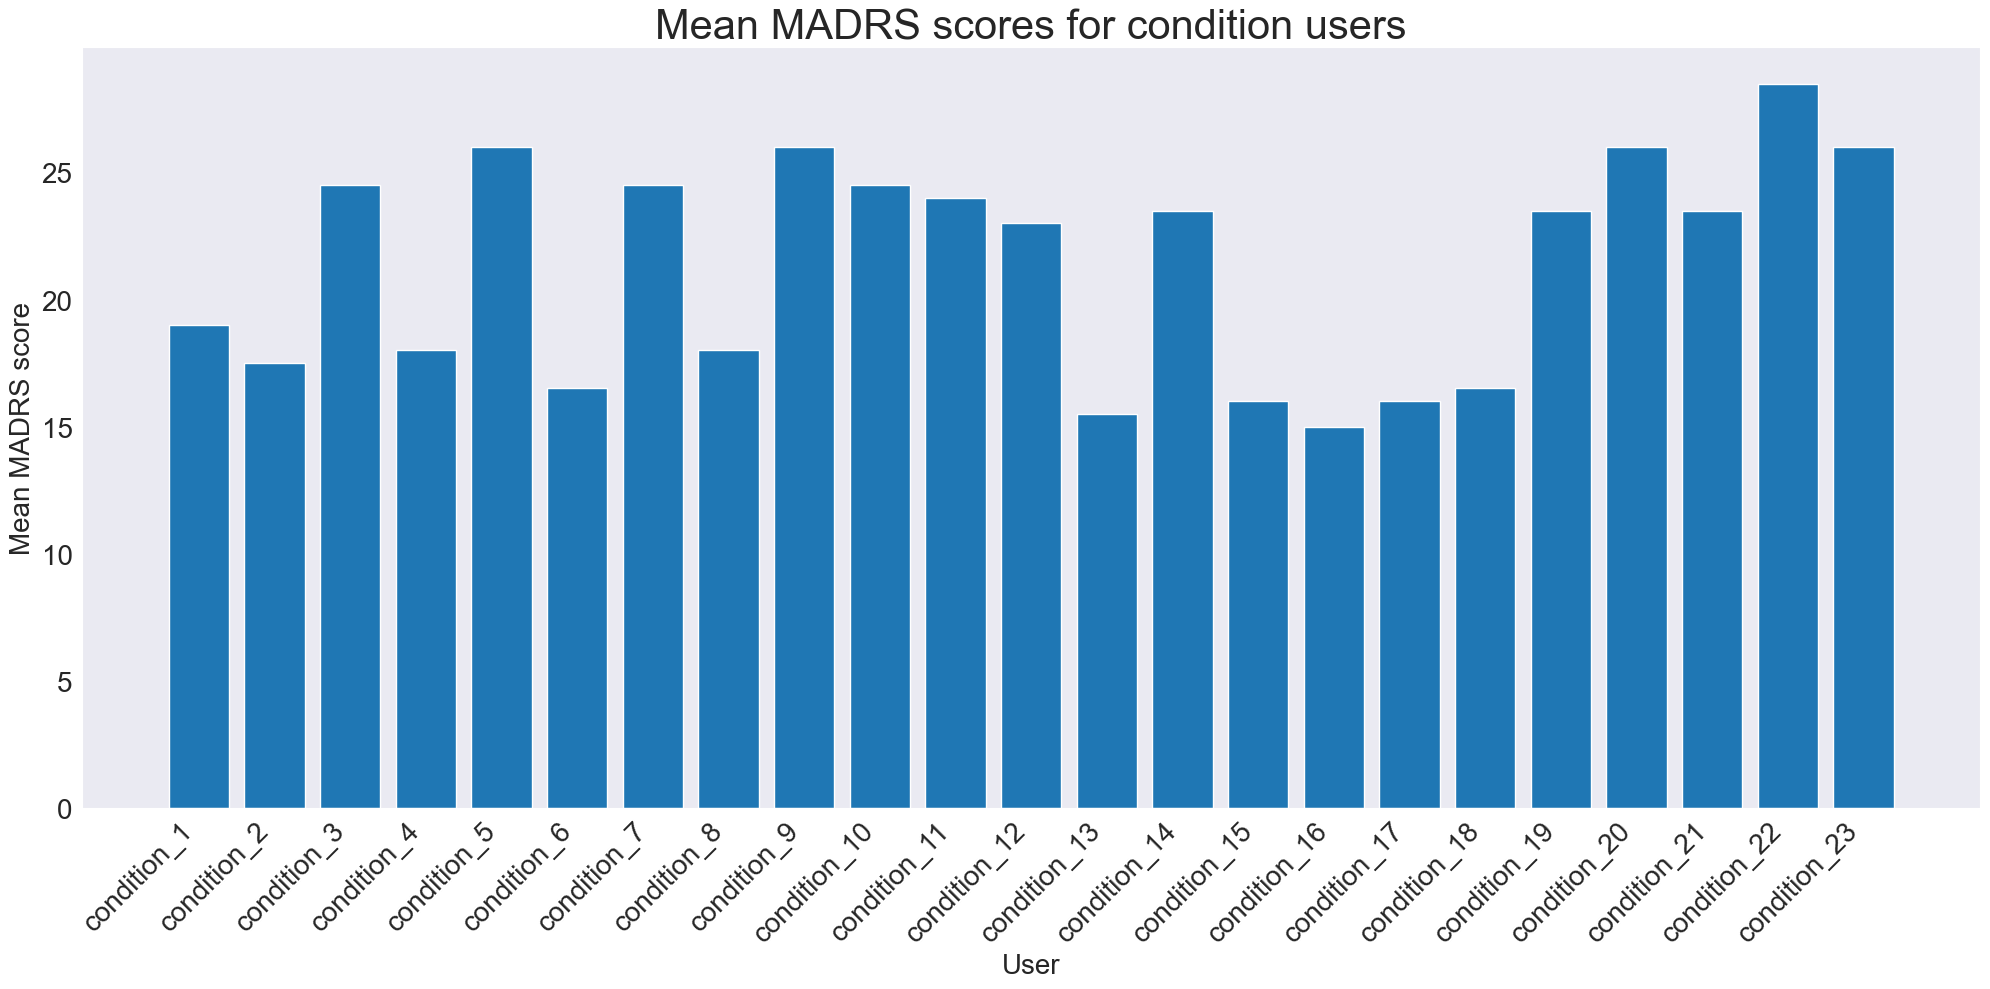

In [51]:
plt.figure(figsize=(20,10))
plt.bar(condition_df['number'], condition_df['madrs_mean'])
plt.xlabel('User')
plt.ylabel('Mean MADRS score')
plt.title('Mean MADRS scores for condition users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.savefig("../visualizations/depresjon/madrs_scores_mean.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/madrs_scores_mean.eps",bbox_inches='tight')
plt.show()

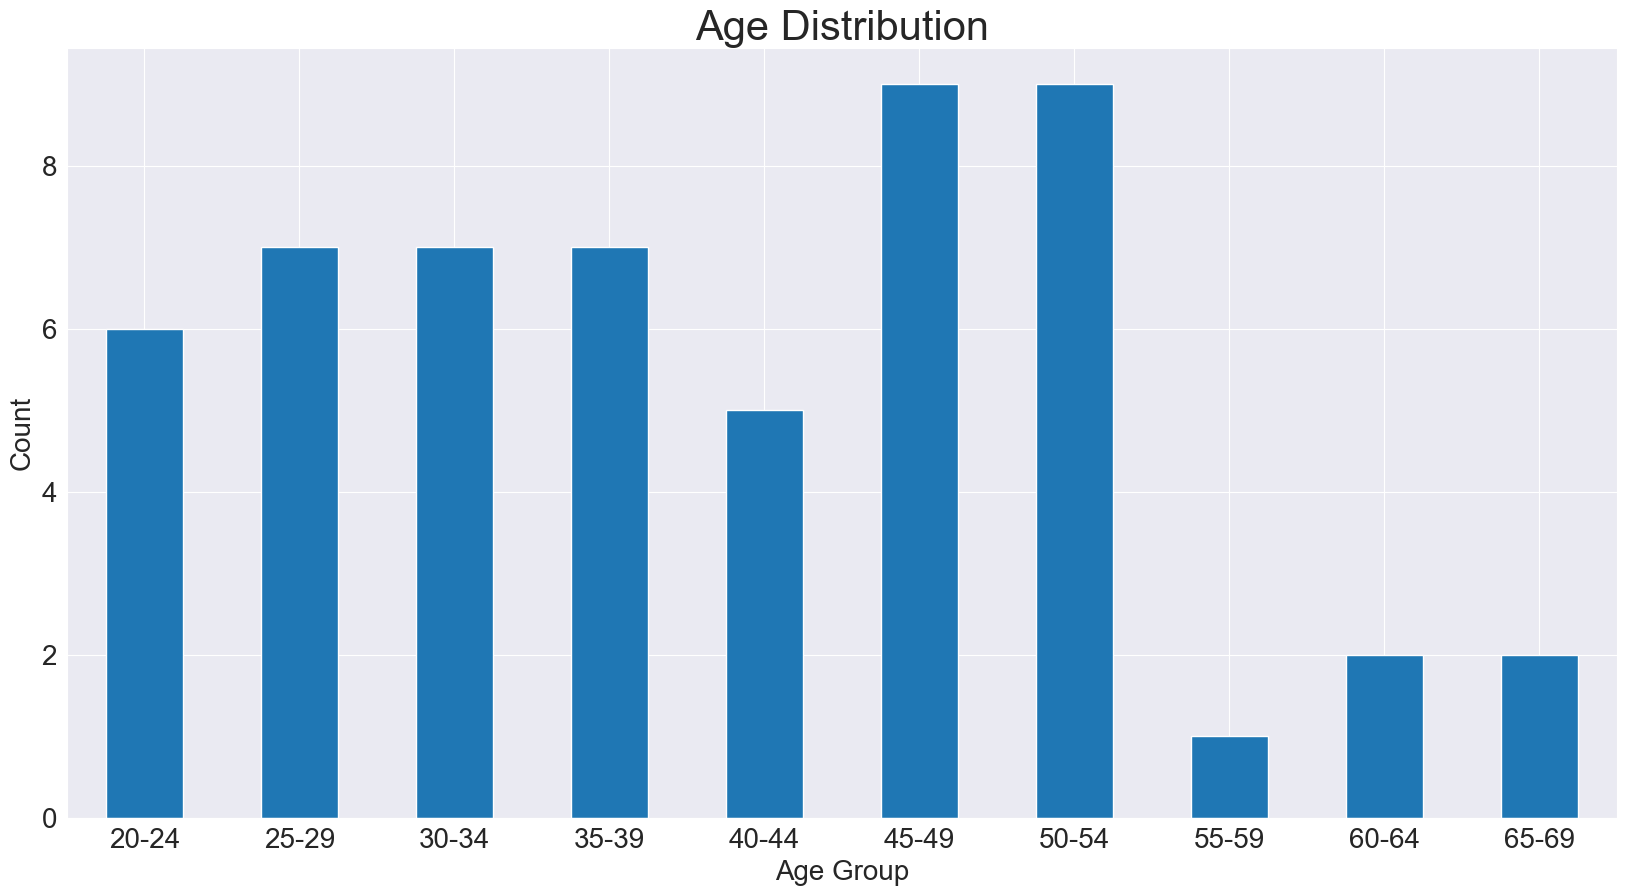

In [52]:
plt.figure(figsize=(20, 10))
df['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig("../visualizations/depresjon/age.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/age.eps",bbox_inches='tight')
plt.show()

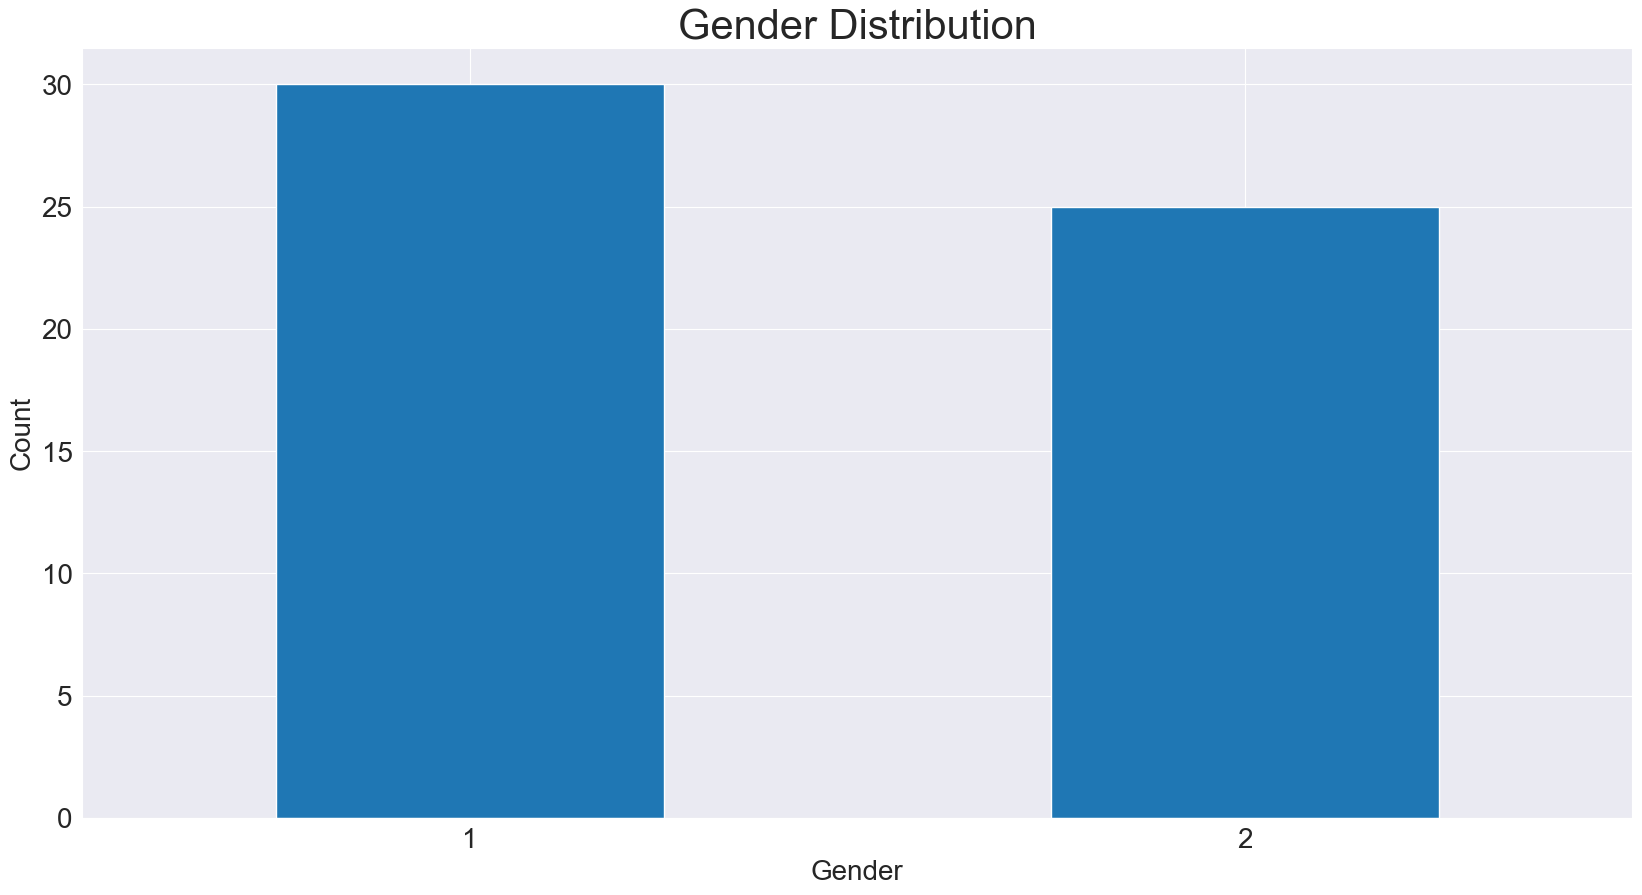

In [53]:
plt.figure(figsize=(20, 10))
df['gender'].value_counts().sort_index().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig("../visualizations/depresjon/gender.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/gender.eps",bbox_inches='tight')
plt.show()

In [54]:
# adds a column with the number of user - run it once
#folder_path = '..\data\depresjon\condition'
#csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

#for csv_file in csv_files:
#    file_path = os.path.join(folder_path, csv_file)
#    folder_name = os.path.splitext(csv_file)[0]
#    user_id = ''.join(filter(str.isdigit, folder_name))
#    df = pd.read_csv(file_path)
#    df['user_id'] = 'condition_%s'%user_id
#    df.to_csv(file_path, index=False)

In [55]:
# adds a column with the number of user - run it once
#folder_path = '..\data\depresjon\control'
#csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

#for csv_file in csv_files:
#    file_path = os.path.join(folder_path, csv_file)
#    folder_name = os.path.splitext(csv_file)[0]
#    user_id = ''.join(filter(str.isdigit, folder_name))
#    df = pd.read_csv(file_path)
#    df['user_id'] = 'control_%s'%user_id
#    df.to_csv(file_path, index=False)

In [56]:
folder_path = '..\data\depresjon\control'
control = pd.DataFrame()
df_list = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        tt = pd.read_csv(file_path)
        df_list.append(tt)

control = pd.concat(df_list, ignore_index=True)

In [57]:
folder_path = '..\data\depresjon\condition'
condition = pd.DataFrame()
df_list = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        tt = pd.read_csv(file_path)
        df_list.append(tt)

condition = pd.concat(df_list, ignore_index=True)

In [58]:
dt = pd.concat([condition, control], axis=0, ignore_index=True)
dt

,timestamp,date,activity,user_id
0,2003-05-07 12:00:00,2003-05-07,0,condition_1
1,2003-05-07 12:01:00,2003-05-07,143,condition_1
2,2003-05-07 12:02:00,2003-05-07,0,condition_1
3,2003-05-07 12:03:00,2003-05-07,20,condition_1
4,2003-05-07 12:04:00,2003-05-07,166,condition_1
...,...,...,...,...
1571701,2003-12-01 12:53:00,2003-12-01,7,control_9
1571702,2003-12-01 12:54:00,2003-12-01,7,control_9
1571703,2003-12-01 12:55:00,2003-12-01,5,control_9
1571704,2003-12-01 12:56:00,2003-12-01,5,control_9


In [59]:
participants = dt['user_id'].unique()
tt = pd.DataFrame()

for participant in participants:
    user_df = dt[dt['user_id'] == participant]
    user_df['timestamp'] = pd.to_datetime(user_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
    user_df['activity'] = pd.to_numeric(user_df['activity'])
    # Resample and calculate the mean
    resampled_user_df = user_df.resample('D', on='timestamp').mean()
    # Add the user_id column back to the resampled data
    resampled_user_df['user_id'] = participant
    # Concatenate the resampled data to the main DataFrame
    tt = pd.concat([tt, resampled_user_df])

# Resetting the index
tt.reset_index(inplace=True)
tt

C:\Users\Christina\AppData\Local\Temp\ipykernel_48816\2090785812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['timestamp'] = pd.to_datetime(user_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
C:\Users\Christina\AppData\Local\Temp\ipykernel_48816\2090785812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['activity'] = pd.to_numeric(user_df['activity'])


,timestamp,activity,user_id
0,2003-05-07,174.144444,condition_1
1,2003-05-08,156.247222,condition_1
2,2003-05-09,124.135417,condition_1
3,2003-05-10,134.961806,condition_1
4,2003-05-11,99.439583,condition_1
...,...,...,...
1139,2003-11-27,5.781250,control_9
1140,2003-11-28,6.401389,control_9
1141,2003-11-29,6.887500,control_9
1142,2003-11-30,7.000000,control_9


In [60]:
tt.isnull().sum()

timestamp    0
activity     0
user_id      0
dtype: int64

In [61]:
# merge with demographics
merged_df = pd.merge(tt, df, left_on='user_id', right_on='number', how='left')
merged_df

,timestamp,activity,user_id,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07,174.144444,condition_1,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-08,156.247222,condition_1,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-09,124.135417,condition_1,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-10,134.961806,condition_1,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-11,99.439583,condition_1,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2003-11-27,5.781250,control_9,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1140,2003-11-28,6.401389,control_9,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1141,2003-11-29,6.887500,control_9,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1142,2003-11-30,7.000000,control_9,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


In [62]:
merged_df.isnull().sum()

timestamp       0
activity        0
user_id         0
number          0
days            0
gender          0
age             0
afftype       739
melanch       784
inpatient     739
edu            53
marriage      739
work          739
madrs1        739
madrs2        739
madrs_mean    739
dtype: int64

In [63]:
#create_report(merged_df).show_browser()

In [64]:
merged_df.drop('number', axis=1, inplace=True)
merged_df

,timestamp,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07,174.144444,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-08,156.247222,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-09,124.135417,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-10,134.961806,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-11,99.439583,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2003-11-27,5.781250,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1140,2003-11-28,6.401389,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1141,2003-11-29,6.887500,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1142,2003-11-30,7.000000,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


In [65]:
# import the data into mongo

# Load environment variables
#try:
#    load_dotenv()
#except:
#    pass

#mongo_url = os.getenv('MONGO_URL')
#mongo_port = int(os.getenv('MONGO_PORT'))
#mongo_username = os.getenv('MONGO_USERNAME')
#mongo_password = os.getenv('MONGO_PASSWORD')
#mongo_auth_source = os.getenv('MONGO_AUTH_SOURCE')
#mongo_auth_mechanism = os.getenv('MONGO_AUTH_MECHANISM')

#data_dict = merged_df.to_dict("records")

# Create the client using environment variables
#client = MongoClient(mongo_url, int(mongo_port), username=mongo_username, password=mongo_password,authSource=mongo_auth_source, authMechanism=mongo_auth_mechanism)
#db = client['depresjon-dataset']
#collection = db['depresjon']

#collection.insert_many(data_dict)

In [66]:
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
merged_df

,timestamp,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07,174.144444,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-08,156.247222,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-09,124.135417,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-10,134.961806,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-11,99.439583,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2003-11-27,5.781250,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1140,2003-11-28,6.401389,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1141,2003-11-29,6.887500,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
1142,2003-11-30,7.000000,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


In [67]:
# Splitting timestamp column into two separate date and time columns
merged_df['date'] = pd.to_datetime(merged_df['timestamp']).dt.date
merged_df['time'] = pd.to_datetime(merged_df['timestamp']).dt.time

In [68]:
# Group by 'user_id' and 'date' and calculate the mean activity for each day for each participant
grouped_data = merged_df.groupby(['user_id', 'date'])['activity'].mean().reset_index()

# Get a list of unique participants
participants = merged_df['user_id'].unique()

# Create a plot for each participant
for participant in participants:
    participant_data = grouped_data[grouped_data['user_id'] == participant]
    plt.figure(figsize=(20, 10))
    sns.lineplot(x='date', y='activity', data=participant_data)
    plt.title(f'Mean Daily Activity for {participant}')
    plt.xlabel('Date')
    plt.ylabel('Mean Activity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../visualizations/depresjon/%s_mean_daily_activity.png'%participant,bbox_inches='tight')
    plt.savefig('../visualizations/depresjon/%s_mean_daily_activity.eps'%participant,bbox_inches='tight')
    plt.close()

In [69]:
#create_report(df).show_browser()

In [70]:
df_cleaned = merged_df.dropna(subset=['madrs_mean'])
df_cleaned

,timestamp,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,date,time
0,2003-05-07,174.144444,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-07,00:00:00
1,2003-05-08,156.247222,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-08,00:00:00
2,2003-05-09,124.135417,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-09,00:00:00
3,2003-05-10,134.961806,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-10,00:00:00
4,2003-05-11,99.439583,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-11,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,162.295833,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,2004-06-06,00:00:00
401,2004-06-07,224.508333,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,2004-06-07,00:00:00
402,2004-06-08,202.056250,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,2004-06-08,00:00:00
403,2004-06-09,168.656250,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,2004-06-09,00:00:00


In [71]:
#create_report(df_cleaned).show_browser()

In [72]:
df_cleaned.columns

Index(['timestamp', 'activity', 'user_id', 'days', 'gender', 'age', 'afftype',
       'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2',
       'madrs_mean', 'date', 'time'],
      dtype='object')

In [73]:
df_cleaned = df_cleaned[['timestamp', 'date', 'time', 'user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'madrs_mean']]
df_cleaned

,timestamp,date,time,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07,2003-05-07,00:00:00,condition_1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-08,2003-05-08,00:00:00,condition_1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-09,2003-05-09,00:00:00,condition_1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-10,2003-05-10,00:00:00,condition_1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-11,2003-05-11,00:00:00,condition_1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,condition_9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
401,2004-06-07,2004-06-07,00:00:00,condition_9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
402,2004-06-08,2004-06-08,00:00:00,condition_9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
403,2004-06-09,2004-06-09,00:00:00,condition_9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0


In [74]:
df_cleaned.to_pickle("../data/depresjon/depresjon_unprocessed.pkl")

# Heatmaps

In [75]:
dt.reset_index(inplace=True)

In [76]:
dt

,index,timestamp,date,activity,user_id
0,0,2003-05-07 12:00:00,2003-05-07,0,condition_1
1,1,2003-05-07 12:01:00,2003-05-07,143,condition_1
2,2,2003-05-07 12:02:00,2003-05-07,0,condition_1
3,3,2003-05-07 12:03:00,2003-05-07,20,condition_1
4,4,2003-05-07 12:04:00,2003-05-07,166,condition_1
...,...,...,...,...,...
1571701,1571701,2003-12-01 12:53:00,2003-12-01,7,control_9
1571702,1571702,2003-12-01 12:54:00,2003-12-01,7,control_9
1571703,1571703,2003-12-01 12:55:00,2003-12-01,5,control_9
1571704,1571704,2003-12-01 12:56:00,2003-12-01,5,control_9


In [77]:
participants

array(['condition_1', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14', 'condition_15', 'condition_16',
       'condition_17', 'condition_18', 'condition_19', 'condition_2',
       'condition_20', 'condition_21', 'condition_22', 'condition_23',
       'condition_3', 'condition_4', 'condition_5', 'condition_6',
       'condition_7', 'condition_8', 'condition_9', 'control_1',
       'control_10', 'control_11', 'control_12', 'control_13',
       'control_14', 'control_15', 'control_16', 'control_17',
       'control_18', 'control_19', 'control_2', 'control_20',
       'control_21', 'control_22', 'control_23', 'control_24',
       'control_25', 'control_26', 'control_27', 'control_28',
       'control_29', 'control_3', 'control_30', 'control_31',
       'control_32', 'control_4', 'control_5', 'control_6', 'control_7',
       'control_8', 'control_9'], dtype=object)

In [88]:
tt = pd.DataFrame()

for participant in participants:
    user_df = dt[dt['user_id'] == participant].copy()
    user_df['timestamp'] = pd.to_datetime(user_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
    user_df = user_df.set_index('timestamp')
    user_df['activity'] = pd.to_numeric(user_df['activity'])
    resampled_user_df = user_df.resample('H').mean()
    resampled_user_df['user_id'] = participant
    tt = pd.concat([tt, resampled_user_df.reset_index()])

In [89]:
condition_df = dt[dt['user_id'].str.startswith('condition')]
control_df = dt[dt['user_id'].str.startswith('control')]

In [90]:
# Splitting timestamp column into two separate date and time columns
dt['date'] = pd.to_datetime(dt['timestamp']).dt.date
dt['time'] = pd.to_datetime(dt['timestamp']).dt.time
days=dt['date']
hours=dt['time']
freq=dt['activity']
df1=pd.concat([days,hours,freq],axis=1)
piv = pd.pivot_table(df1, values='activity',index=["time"], columns=["date"], fill_value=0)

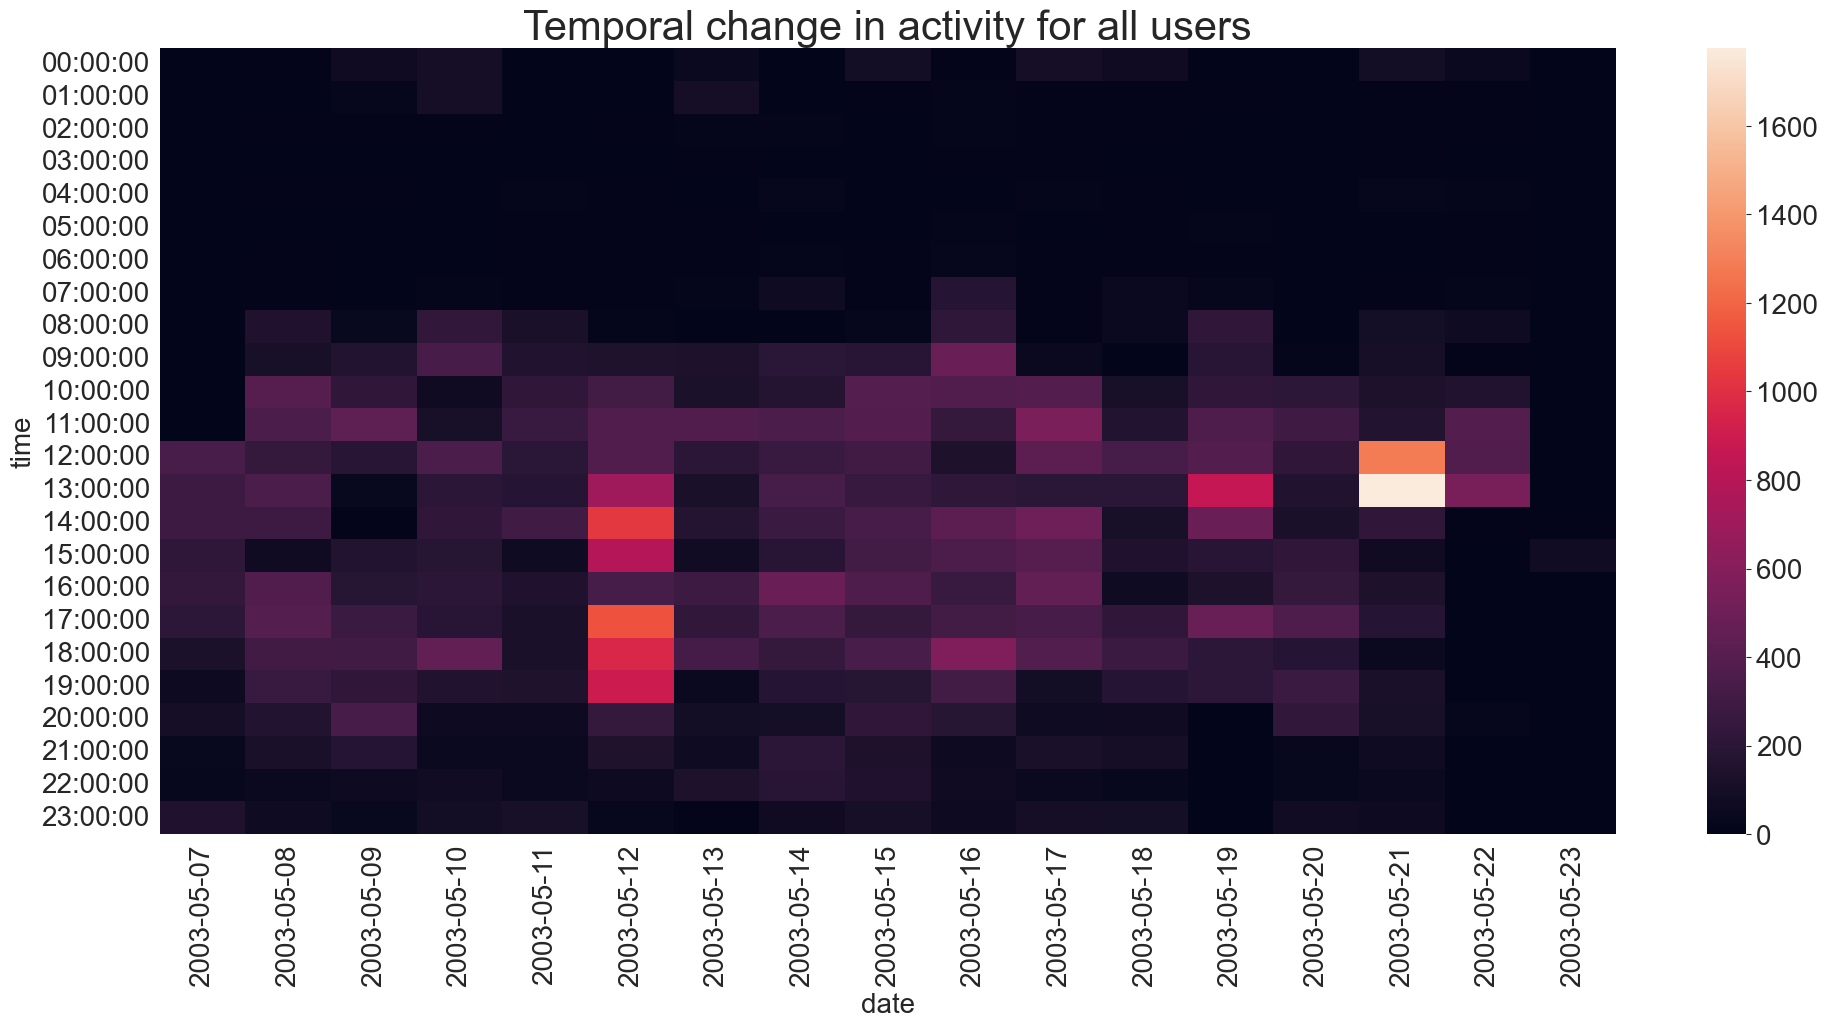

In [91]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(piv)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.title('Temporal change in activity for all users')
plt.savefig('../visualizations/depresjon/activity-heatmap.png',bbox_inches='tight')
plt.savefig('../visualizations/depresjon/activity-heatmap.eps',bbox_inches='tight')
plt.show()

In [92]:
df1

,date,time,activity
0,2003-05-07,12:00:00,346.550000
1,2003-05-07,13:00:00,284.566667
2,2003-05-07,14:00:00,279.183333
3,2003-05-07,15:00:00,218.783333
4,2003-05-07,16:00:00,238.550000
...,...,...,...
383,2003-05-23,11:00:00,0.000000
384,2003-05-23,12:00:00,0.000000
385,2003-05-23,13:00:00,0.000000
386,2003-05-23,14:00:00,11.400000


In [93]:
df1['date'] = pd.to_datetime(df1['date'])
# Converting date to day of the week
df1['DayName'] = pd.Series(df1['date'].dt.day_name(), index=df1.index)
# Days of the week in ascending order
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df1

,date,time,activity,DayName
0,2003-05-07,12:00:00,346.550000,Wednesday
1,2003-05-07,13:00:00,284.566667,Wednesday
2,2003-05-07,14:00:00,279.183333,Wednesday
3,2003-05-07,15:00:00,218.783333,Wednesday
4,2003-05-07,16:00:00,238.550000,Wednesday
...,...,...,...,...
383,2003-05-23,11:00:00,0.000000,Friday
384,2003-05-23,12:00:00,0.000000,Friday
385,2003-05-23,13:00:00,0.000000,Friday
386,2003-05-23,14:00:00,11.400000,Friday


In [94]:
# Sort values by 'DayName'
df1['DayName'] = pd.Categorical(df1['DayName'], categories=weekdays, ordered=True)
df1 = df1.sort_values('DayName')

piv1 = pd.pivot_table(df1, values='activity', index=["time"], columns=["DayName"], fill_value=0)
piv1

DayName,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time,,,,,,,
00:00:00,3.358333,26.000000,45.050000,48.377778,26.038889,99.508333,37.825000
01:00:00,5.850000,50.241667,5.000000,7.738889,13.838889,56.050000,6.325000
02:00:00,8.683333,7.866667,11.341667,7.127778,8.333333,7.866667,8.841667
03:00:00,4.733333,4.766667,6.575000,3.983333,3.333333,5.175000,6.483333
04:00:00,8.366667,0.150000,23.916667,11.322222,6.277778,10.766667,13.666667
05:00:00,13.616667,3.650000,2.108333,5.183333,8.166667,0.750000,9.358333
06:00:00,10.741667,6.266667,11.075000,10.244444,10.894444,4.975000,11.591667
07:00:00,17.591667,8.291667,39.250000,15.111111,61.005556,13.066667,28.966667
08:00:00,120.283333,3.291667,49.091667,78.794444,86.100000,120.216667,80.375000


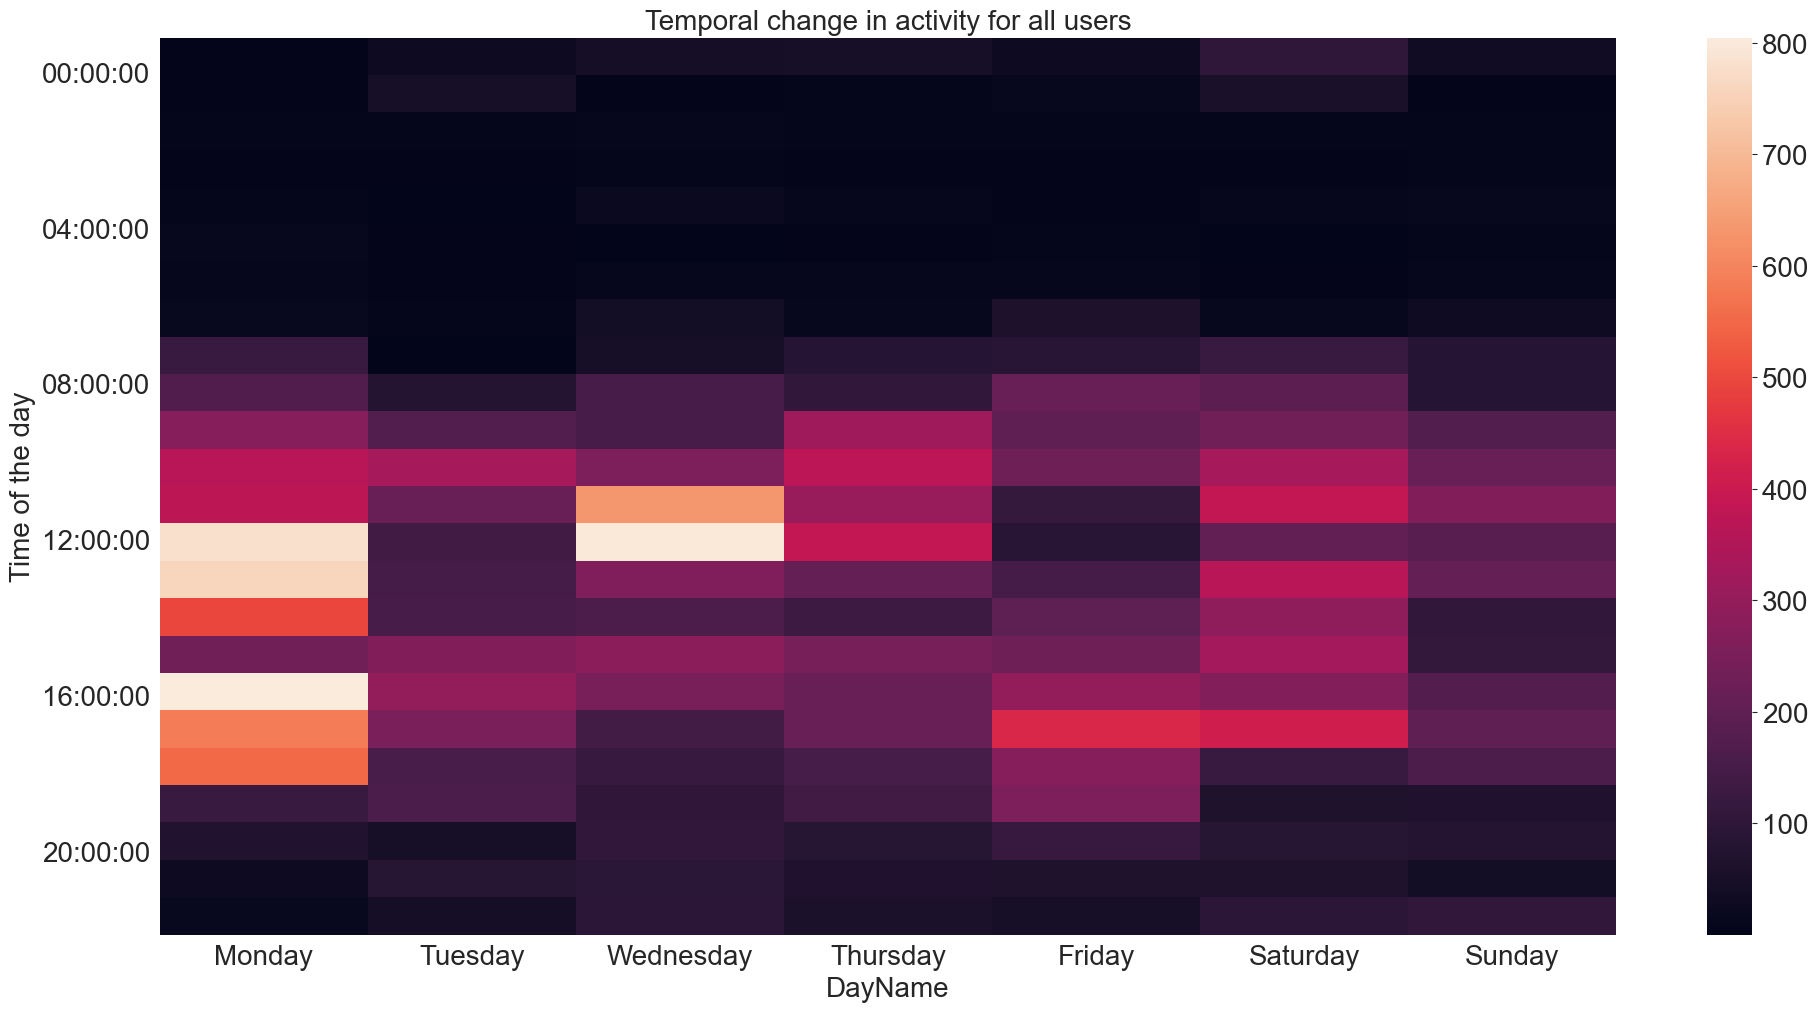

In [95]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(piv1)
plt.tight_layout()
ax.yaxis.set_major_locator(md.HourLocator(interval = 100))
ax.yaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
ax.set_rasterization_zorder(0)
plt.ylabel('Time of the day')
plt.title('Temporal change in activity for all users',fontsize=20)
plt.savefig('../visualizations/depresjon/activity-heatmap-wdays.png',bbox_inches='tight')
plt.savefig('../visualizations/depresjon/activity-heatmap-wdays.eps',bbox_inches='tight')
plt.show()